In [2]:
import numpy as np

# Network parameters

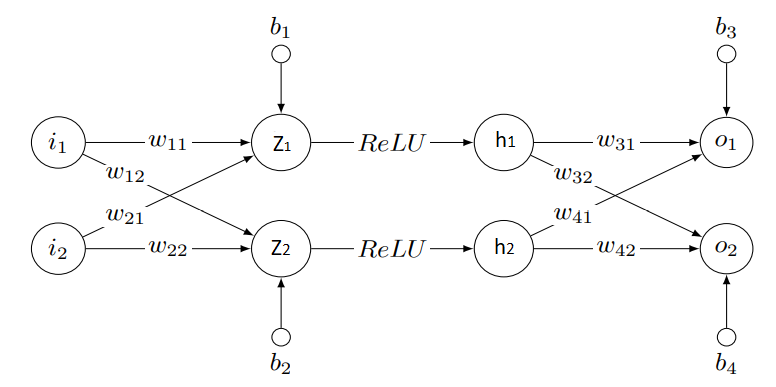

In [27]:
inputs = [2.0, -1.0]
targets = [1.0, 0.5]

weights_1 = [[1, -0.5],
             [0.5, -1]]
bias_1 = [0.5, -0.5]

weights_2 = [[0.5, -1],
             [-0.5, 1]]
bias_2 = [-1, 0.5]

# Activation Function (ReLU)

In [7]:
def ReLU(x):
    
    activation = []
    
    for i in x:
        activation.append(max(0, i))
    return activation

# Network

In [112]:
class Network():
    def __init__(self, inputs, targets, weights_1, bias_1, weights_2, bias_2):
        self.inputs = inputs
        self.weights_1 = weights_1
        self.bias_1 = bias_1
        self.weights_2 = weights_2
        self.bias_2 = bias_2
        self.targets = targets
        
        self.lr = 0.1
        
    def Forward(self):
        # input -> hidden
        Z = np.matmul(self.inputs, self.weights_1) + self.bias_1
        h = ReLU(Z)
        
        # hidden -> output
        self.O = np.matmul(h, self.weights_2) + self.bias_2
    
        print(f"Network Output = {self.O}")
    
    def MSE(self):
        self.mse = 0
        for i in range(len(self.O)):
            self.mse += (self.targets[i] - self.O[i]) ** 2
        
        self.mse = self.mse / len(self.O)
        print(self.mse)
        
    def Backpropagation(self):
        
        print(f"before: W12: {self.weights_1[0][1]}, W21: {self.weights_1[1][0]}")
        
        w21 = self.weights_1[1][0] - (self.lr * ((self.O[0] - self.targets[0]) * self.weights_2[0][0] * self.inputs[1] * 1))
        w12 = self.weights_1[0][1] - (self.lr * ((self.O[1] - self.targets[1]) * self.weights_2[1][1] * self.inputs[0] * 0))
        
        print(f"After: W12: {w12}, W21: {w21}")

In [113]:
net = Network(inputs, targets, weights_1, bias_1, weights_2, bias_2)

In [114]:
net.Forward()

Network Output = [ 0.  -1.5]


In [115]:
net.MSE()

2.5


In [116]:
net.Backpropagation()

before: W12: -0.5, W21: 0.5
After: W12: -0.5, W21: 0.45
